In [1]:
# 1) 평점과 관객수
# 2) 수상작과 흥행작의 네이버/왓챠 평점 차이 
# 3) 장르별 흥행과 수상의 상관관계 

# 가설

관객들로부터 흥행하는 장르와 영화제에서 수상하는 장르는 동일할 것이다.

# 데이터 수집

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Mal' in f.name]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgun.ttf')]

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
수상작 = pd.read_csv("수상작_리뷰.csv", encoding='cp949')
흥행작 = pd.read_csv("1020흥행작.csv",  encoding='cp949')

# 전처리

In [4]:
수상 = 수상작[['연도','제목', '장르']]
수상 = 수상.dropna()
수상

,연도,제목,장르
0,2020,사탄은 없다,"드라마, 액션"
1,2020,노마드랜드,드라마
2,2019,기생충,드라마
3,2019,시너님스,드라마
4,2019,조커,"스릴러, 드라마, 범죄"
5,2018,어느 가족,"범죄, 드라마"
6,2018,그린 북,"코미디, 드라마, 음악"
7,2018,터치 미 낫,드라마
8,2018,로마,드라마
9,2017,더 스퀘어,"드라마, 코미디"


In [5]:
흥행 = 흥행작[['연도','제목','장르']]
흥행 = 흥행.dropna()
흥행

,연도,제목,장르
0,2010,아바타,SF
1,2010,아저씨,드라마
2,2010,인셉션,액션
3,2010,의형제,드라마
4,2010,아이언맨 2,SF
...,...,...,...
105,2020,백두산,드라마
106,2020,#살아있다,드라마
107,2020,강철비2: 정상회담,드라마
108,2020,담보,드라마


In [6]:
df = pd.DataFrame(수상.groupby('장르')['제목'].count())

df = df.rename({"장르":"장르구분","제목":"횟수"},axis = "columns")
df = df.reset_index()
df

,장르,횟수
0,다큐멘터리,2
1,드라마,12
2,"드라마, 로맨스",3
3,"드라마, 스릴러",4
4,"드라마, 스릴러, 범죄",1
5,"드라마, 액션",1
6,"드라마, 역사",1
7,"드라마, 코미디",2
8,"드라마, 판타지",1
9,"드라마, 판타지, 미스터리",1


In [7]:
df1 = pd.DataFrame(흥행.groupby('장르')['제목'].count())

df1 = df1.rename({"장르":"장르구분","제목":"횟수"},axis = "columns")
df1 = df1.reset_index()
df1

,장르,횟수
0,SF,5
1,가족,2
2,드라마,28
3,로맨스,2
4,모험,6
5,미스터리,1
6,범죄,5
7,스릴러,3
8,시대극,7
9,애니메이션,2


# 분석

In [8]:
genre=[]
for i in range(len(수상)):
    genre += 수상.loc[i,"장르"].split(",")
    
from collections import Counter
수상작_장르_횟수 = dict(Counter([x.strip() for x in genre]))
df = pd.DataFrame([수상작_장르_횟수]).T

In [9]:
df = df.reset_index()
df.columns = ["장르","횟수"]
df.head()

,장르,횟수
0,드라마,38
1,액션,1
2,스릴러,7
3,범죄,4
4,코미디,6


In [10]:
sorted_df1 = df1.sort_values(by = "횟수",ascending=False)
sorted_df1.head()

,장르,횟수
10,액션,37
2,드라마,28
8,시대극,7
12,코미디,7
4,모험,6


# 시각화

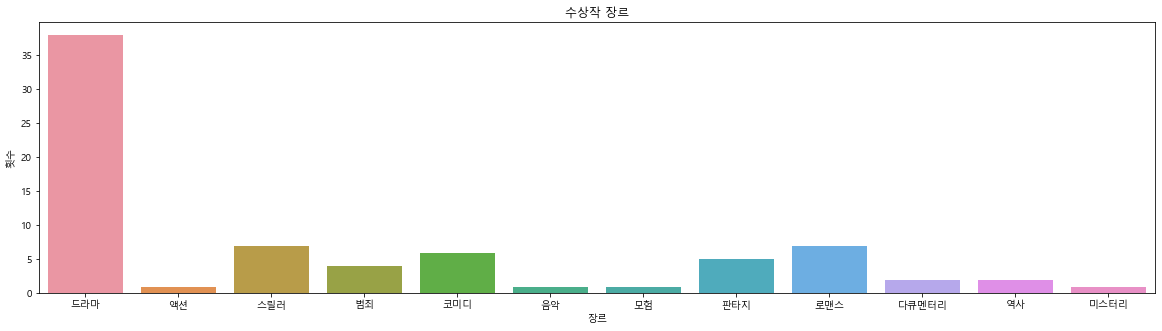

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
수상작 = sns.barplot(data=df, x='장르' ,y= '횟수')
수상작.title.set_text("수상작 장르")


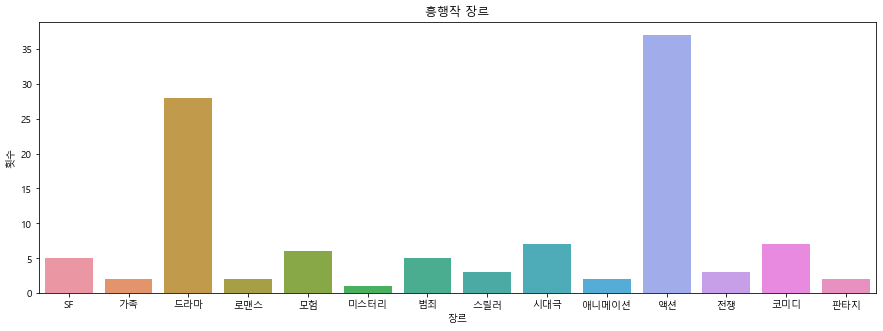

In [12]:
plt.rcParams['figure.figsize'] = [15, 5]
흥행작 = sns.barplot(data=df1, x='장르' ,y= '횟수')
흥행작.title.set_text("흥행작 장르")

##  etc) 흥행작으로 보는 연도별 유행 장르

In [13]:
for i in 흥행["장르"].unique():
    흥행.loc[흥행["장르"] == i, i] = 1

In [20]:
연도별_장르_흥행 = 흥행.groupby("연도").sum()
연도별_장르_흥행 = 연도별_장르_흥행.reset_index()
연도별_장르_흥행

,연도,SF,드라마,액션,전쟁,시대극,애니메이션,코미디,스릴러,모험,범죄,로맨스,미스터리,가족,판타지
0,2010,2.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,0.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2012,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0
3,2013,1.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,0.0,3.0,3.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,2015,0.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,2016,0.0,2.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,2017,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0
8,2018,2.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2019,0.0,2.0,3.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


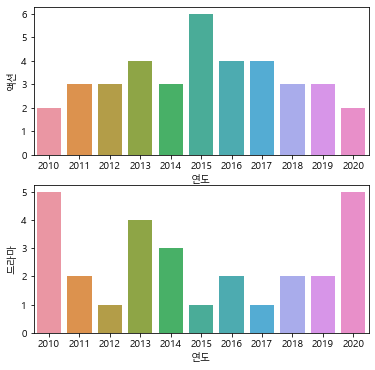

In [24]:
figure, axes = plt.subplots(nrows= 2, ncols=1, figsize=(6,6))
sns.barplot(data=연도별_장르_흥행, x='연도' ,y= '액션', ax= axes[0])
sns.barplot(data=연도별_장르_흥행, x='연도' ,y= '드라마', ax= axes[1])